In [1]:
# Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Loading data
df_assessments = pd.read_csv('assessments.csv')
df_courses = pd.read_csv('courses.csv')
df_studentAssessment = pd.read_csv('studentAssessment.csv')
df_studentInfo = pd.read_csv('studentInfo.csv')
df_studentRegistration = pd.read_csv('studentRegistration.csv')
df_studentVle = pd.read_csv('studentVle.csv')
df_vle = pd.read_csv('vle.csv')

In [32]:
new_df = df_studentInfo.dropna()[['code_module', 'id_student', 'code_presentation', 'final_result']].drop_duplicates()
new_df = new_df[(new_df['final_result']=='Distinction') | (new_df['final_result']=='Pass') | (new_df['final_result']=='Fail')]
new_df

,code_module,id_student,code_presentation,final_result
0,AAA,11391,2013J,Pass
1,AAA,28400,2013J,Pass
3,AAA,31604,2013J,Pass
4,AAA,32885,2013J,Pass
5,AAA,38053,2013J,Pass
...,...,...,...,...
32587,GGG,2620947,2014J,Distinction
32588,GGG,2640965,2014J,Fail
32589,GGG,2645731,2014J,Distinction
32590,GGG,2648187,2014J,Pass


In [33]:
print(len(new_df[(new_df['final_result'] == 'Pass') | (new_df['final_result'] == 'Distinction')])/len(new_df))
print(len(new_df[new_df['final_result'] == 'Fail'])/len(new_df))

0.6796679343289119
0.320332065671088


In [34]:
def accuracy1(tp, tn, fp, fn):
    return (tp+tn)/(tp+tn+fp+fn)

def precision1(tp, fp):
    return tp/(tp+fp)

def recall(tp, fn):
    return tp/(tp+fn)

def F1(precision, recall):
    return (2*(precision*recall))/(precision+recall)

In [72]:
daily_activity = new_df.merge(df_studentVle, how='inner', left_on=['code_module','code_presentation', 'id_student'], right_on=['code_module','code_presentation', 'id_student'])
daily_activity

,code_module,id_student,code_presentation,final_result,id_site,date,sum_click
0,AAA,11391,2013J,Pass,546669,-5,16
1,AAA,11391,2013J,Pass,546662,-5,44
2,AAA,11391,2013J,Pass,546652,-5,1
3,AAA,11391,2013J,Pass,546668,-5,2
4,AAA,11391,2013J,Pass,546652,-5,1
...,...,...,...,...,...,...,...
9136027,GGG,2684003,2014J,Distinction,896961,205,13
9136028,GGG,2684003,2014J,Distinction,896959,205,2
9136029,GGG,2684003,2014J,Distinction,896943,219,1
9136030,GGG,2684003,2014J,Distinction,896961,219,31


In [73]:
daily_activity = daily_activity[['date', 'sum_click']].groupby('date').sum()
daily_activity['date'] = daily_activity.index
daily_activity

,sum_click,date
date,,
-25,10378,-25
-24,11774,-24
-23,7164,-23
-22,4102,-22
-21,2731,-21
...,...,...
265,2527,265
266,1595,266
267,1879,267


<AxesSubplot:xlabel='date'>

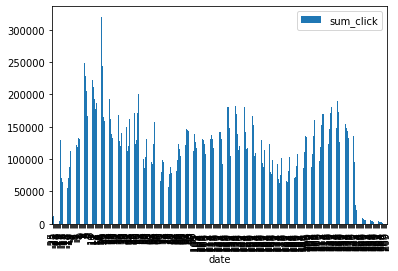

In [74]:
daily_activity.plot.bar(x="date", y="sum_click")

In [78]:
new_df

,code_module,id_student,code_presentation,final_result
0,AAA,11391,2013J,Pass
1,AAA,28400,2013J,Pass
3,AAA,31604,2013J,Pass
4,AAA,32885,2013J,Pass
5,AAA,38053,2013J,Pass
...,...,...,...,...
32587,GGG,2620947,2014J,Distinction
32588,GGG,2640965,2014J,Fail
32589,GGG,2645731,2014J,Distinction
32590,GGG,2648187,2014J,Pass


In [ ]:
from sklearn import tree
from sklearn.model_selection import KFold

# Student Info

In [81]:
df_studentInfo_new = df_studentInfo.merge(new_df, how='inner', right_on=['code_module', 'code_presentation', 'id_student', 'final_result'], left_on=['code_module', 'code_presentation', 'id_student', 'final_result'])
df_studentInfo_new

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
21557,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Distinction
21558,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
21559,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
21560,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass


# Daily Activity

In [150]:
np_values = new_df.values
np_daily = []
for i in range(len(np_values)):
    for j in range(245):
        np_daily.append([np_values[i][0], np_values[i][1], np_values[i][2], j])
np_daily

array([['AAA', 11391, '2013J', 'Pass'],
       ['AAA', 28400, '2013J', 'Pass'],
       ['AAA', 31604, '2013J', 'Pass'],
       ...,
       ['GGG', 2645731, '2014J', 'Distinction'],
       ['GGG', 2648187, '2014J', 'Pass'],
       ['GGG', 2684003, '2014J', 'Distinction']], dtype=object)

In [168]:
df_daily = pd.DataFrame(np_daily)
df_daily = df_daily.rename(columns={0:'code_module', 1:'id_student', 2:'code_presentation', 3:'date'})
df_daily

,code_module,id_student,code_presentation,date
0,AAA,11391,2013J,0
1,AAA,11391,2013J,1
2,AAA,11391,2013J,2
3,AAA,11391,2013J,3
4,AAA,11391,2013J,4
...,...,...,...,...
5282685,GGG,2684003,2014J,240
5282686,GGG,2684003,2014J,241
5282687,GGG,2684003,2014J,242
5282688,GGG,2684003,2014J,243


In [166]:
df_counts = df_studentVle[['code_module', 'id_student', 'code_presentation', 'date', 'sum_click']].groupby(['code_module', 'id_student', 'code_presentation', 'date']).sum()
df_counts = df_counts.reset_index(level=['code_module', 'id_student', 'code_presentation', 'date'])
df_counts

,code_module,id_student,code_presentation,date,sum_click
0,AAA,6516,2014J,-23,28
1,AAA,6516,2014J,-22,82
2,AAA,6516,2014J,-20,41
3,AAA,6516,2014J,-17,7
4,AAA,6516,2014J,-12,2
...,...,...,...,...,...
1808114,GGG,2695362,2014B,201,40
1808115,GGG,2695362,2014B,210,9
1808116,GGG,2695362,2014B,212,6
1808117,GGG,2695362,2014B,220,35


In [169]:
df_daily = df_daily.merge(df_counts, how='left', left_on=['code_module', 'id_student', 'code_presentation', 'date'], right_on=['code_module', 'id_student', 'code_presentation', 'date'])
df_daily = df_daily.fillna(0)
df_daily

,code_module,id_student,code_presentation,date,sum_click
0,AAA,11391,2013J,0,49.0
1,AAA,11391,2013J,1,127.0
2,AAA,11391,2013J,2,4.0
3,AAA,11391,2013J,3,0.0
4,AAA,11391,2013J,4,0.0
...,...,...,...,...,...
5282685,GGG,2684003,2014J,240,0.0
5282686,GGG,2684003,2014J,241,0.0
5282687,GGG,2684003,2014J,242,0.0
5282688,GGG,2684003,2014J,243,0.0


In [170]:
def label_activity(row):
    if row['sum_click'] > 0:
        return 1
    else:
        return 0

In [171]:
df_daily['active'] = df_daily.apply(lambda row: label_activity(row), axis=1)
df_daily

,code_module,id_student,code_presentation,date,sum_click,active
0,AAA,11391,2013J,0,49.0,1
1,AAA,11391,2013J,1,127.0,1
2,AAA,11391,2013J,2,4.0,1
3,AAA,11391,2013J,3,0.0,0
4,AAA,11391,2013J,4,0.0,0
...,...,...,...,...,...,...
5282685,GGG,2684003,2014J,240,0.0,0
5282686,GGG,2684003,2014J,241,0.0,0
5282687,GGG,2684003,2014J,242,0.0,0
5282688,GGG,2684003,2014J,243,0.0,0


In [174]:
max_clicks = max(df_daily['sum_click'])
df_daily['normalized'] = df_daily['sum_click']/max_clicks
df_daily

,code_module,id_student,code_presentation,date,sum_click,active,normalized
0,AAA,11391,2013J,0,49.0,1,0.007012
1,AAA,11391,2013J,1,127.0,1,0.018174
2,AAA,11391,2013J,2,4.0,1,0.000572
3,AAA,11391,2013J,3,0.0,0,0.000000
4,AAA,11391,2013J,4,0.0,0,0.000000
...,...,...,...,...,...,...,...
5282685,GGG,2684003,2014J,240,0.0,0,0.000000
5282686,GGG,2684003,2014J,241,0.0,0,0.000000
5282687,GGG,2684003,2014J,242,0.0,0,0.000000
5282688,GGG,2684003,2014J,243,0.0,0,0.000000


In [144]:
df_daily = pd.DataFrame(columns=['code_module', 'id_student', 'code_presentation', 'final_result', 'date'])
index = 0
for i in range(len(new_df)):
    for j in range(245):
        row = new_df.iloc[i]
        df_daily = df_daily.append(row, ignore_index=True)
        df_daily.at[index, 'date'] = j
        index+=1
df_daily

KeyboardInterrupt: 

In [111]:
# Binary
binary_activity = new_df.merge(df_studentVle, how='inner', left_on=['code_module','code_presentation', 'id_student'], right_on=['code_module','code_presentation', 'id_student'])
binary_activity[binary_activity['sum_click'] > 0]
binary_activity = binary_activity[['code_module', 'id_student', 'code_presentation', 'date']].drop_duplicates()
binary_activity = binary_activity.groupby(['code_module', 'id_student', 'code_presentation']).size()
binary_activity

code_module  id_student  code_presentation
AAA          6516        2014J                159
             11391       2013J                 40
             24734       2014J                 56
             26192       2014J                118
             28061       2014J                148
                                             ... 
GGG          2679694     2013J                  5
             2682002     2014B                 28
             2684003     2014J                 34
             2689480     2014B                 75
             2695362     2014B                 29
Length: 21189, dtype: int64

In [114]:
# Counts
counts_activity = new_df.merge(df_studentVle, how='inner', left_on=['code_module','code_presentation', 'id_student'], right_on=['code_module','code_presentation', 'id_student'])
counts_activity

,code_module,id_student,code_presentation,final_result,id_site,date,sum_click
0,AAA,11391,2013J,Pass,546669,-5,16
1,AAA,11391,2013J,Pass,546662,-5,44
2,AAA,11391,2013J,Pass,546652,-5,1
3,AAA,11391,2013J,Pass,546668,-5,2
4,AAA,11391,2013J,Pass,546652,-5,1
...,...,...,...,...,...,...,...
9136027,GGG,2684003,2014J,Distinction,896961,205,13
9136028,GGG,2684003,2014J,Distinction,896959,205,2
9136029,GGG,2684003,2014J,Distinction,896943,219,1
9136030,GGG,2684003,2014J,Distinction,896961,219,31


In [116]:
counts_activity[['code_module', 'id_student', 'code_presentation', 'date', 'sum_click']]


,code_module,id_student,code_presentation,date,sum_click
0,AAA,11391,2013J,-5,16
1,AAA,11391,2013J,-5,44
2,AAA,11391,2013J,-5,1
3,AAA,11391,2013J,-5,2
4,AAA,11391,2013J,-5,1
...,...,...,...,...,...
9136027,GGG,2684003,2014J,205,13
9136028,GGG,2684003,2014J,205,2
9136029,GGG,2684003,2014J,219,1
9136030,GGG,2684003,2014J,219,31


In [97]:
binary_activity[(binary_activity['id_student'] == 11391) & (binary_activity['code_module'] == 'AAA')]

,code_module,id_student,code_presentation,final_result,id_site,date,sum_click,active
0,AAA,11391,2013J,Pass,546669,-5,16,1
1,AAA,11391,2013J,Pass,546662,-5,44,1
2,AAA,11391,2013J,Pass,546652,-5,1,1
3,AAA,11391,2013J,Pass,546668,-5,2,1
4,AAA,11391,2013J,Pass,546652,-5,1,1
...,...,...,...,...,...,...,...,...
191,AAA,11391,2013J,Pass,546733,242,4,1
192,AAA,11391,2013J,Pass,546644,245,2,1
193,AAA,11391,2013J,Pass,546644,245,3,1
194,AAA,11391,2013J,Pass,546614,245,2,1


In [87]:
binary_activity[binary_activity['sum_click'] == 0]

,code_module,id_student,code_presentation,final_result,id_site,date,sum_click


In [ ]:
kf = KFold(n_splits=2)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]